# 1. Agafar el text d'una web

In [66]:
# %pip install spacy
# !python -m spacy download es_core_news_sm
# !python -m spacy download en_core_web_sm
# !python -m spacy download ca_core_news_sm
# %pip install WordCloud


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import spacy
import string
import numpy as np
from bs4 import BeautifulSoup   
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer           #eina de stemming              #diccionari de freqüències
from wordcloud import WordCloud                 #eina de visualització
import matplotlib.pyplot as plt 

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
# # Descargar recursos necesarios de NLTK
nltk.download('punkt_tab')
nltk.download('gutenberg')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to C:\Users\Jose
[nltk_data]     Gómez\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package gutenberg to C:\Users\Jose
[nltk_data]     Gómez\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Jose
[nltk_data]     Gómez\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Ex 3
from sklearn.datasets import fetch_20newsgroups
def train_model(tokens):
    data = fetch_20newsgroups(subset='train', categories=["politics", "sports", "economy", "science", "news", "technology", "health", "culture", "war", "international"])

    model = make_pipeline(CountVectorizer(), MultinomialNB())
    model.fit(data.data, data.target)

In [68]:
# Impressio paraules més freqüents
def show_wordcloud(txt):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(txt)

    # Mostrar el núvol de paraules
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Ocultar ejes
    plt.show()

In [69]:
# Ex 2

def title_article_preprocessing_a(clean_text):
    # 1. Tokenizar el texto
    tokens = word_tokenize(clean_text, language='spanish')
    
    # 2. Normalizar: pasar a minúsculas y quitar puntuación
    tokens = [t.lower() for t in tokens if t.isalpha()]  # solo palabras
    
    # 3. Eliminar palabras vacías (stopwords)
    stop_words = set(stopwords.words('spanish'))
    tokens = [t for t in tokens if t not in stop_words]
    
    print(tokens[:50])  # mostrar los primeros 50 tokens procesados


def title_article_preprocessing_b(clean_text):
    # Carrega del model
    
    nlp = spacy.load("en_core_web_sm")
    
    # Processament
    doc = nlp(clean_text)
    
    # 1. Neteja bàsica amb spaCy (Eliminar stop words i puntuació)
    tokens_limpios = [
    token.text.strip() 
    for token in doc 
    if not token.is_stop and not token.is_punct and not token.is_space
    ]

    # Per si de cas queda algun string buit després del strip()
    tokens_limpios = [t for t in tokens_limpios if t]

    print(f"Primers 20 tokens nets (Opció B): {tokens_limpios[:20]}")
    
    show_wordcloud(' '.join(tokens_limpios))
    train_model(tokens_limpios)



Home
BMC Biology
Article
Comparative analysis of morabine grasshopper genomes reveals highly abundant transposable elements and rapidly proliferating satellite DNA repeats
Research article
Open access
Published:
21 December 2020
Volume 18
, article number
199
, (
2020
)
Cite this article
You have full access to this
open access
article
Download PDF
Save article
View saved research
BMC Biology
Aims and scope
Submit manuscript
Comparative analysis of morabine grasshopper genomes reveals highly abundant transposable elements and rapidly proliferating satellite DNA repeats
Download PDF
Octavio M. Palacios-Gimenez
ORCID:
orcid.org/0000-0002-1472-9949
1
,
2
,
Julia Koelman
1
,
Marc Palmada-Flores
1
,
Tessa M. Bradford
3
,
4
,
Karl K. Jones
3
,
Steven J. B. Cooper
3
,
4
,
Takeshi Kawakami
1
,
5
na1
&
…
Alexander Suh
1
,
2
,
6
na1
Show authors
6441
Accesses
47
Citations
12
Altmetric
Explore all metrics
Abstract
Background
Repetitive DNA sequences, including transposable elements (TEs) and tand

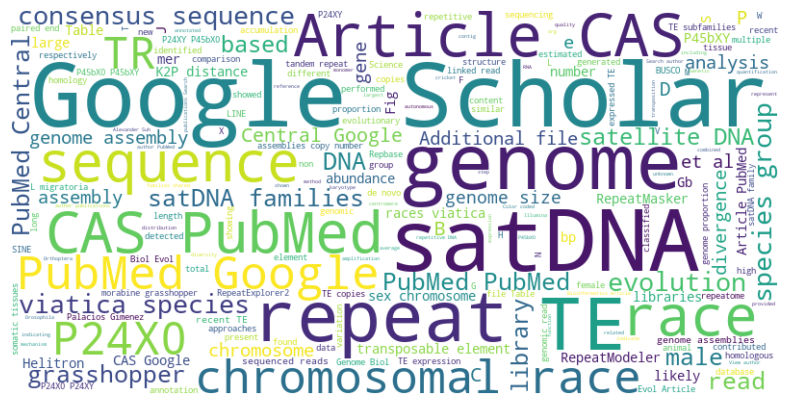

TypeError: 'list' object is not callable

In [70]:
import requests
from bs4 import BeautifulSoup

url = "https://link.springer.com/article/10.1186/s12915-020-00925-x"

opcio = input("Selecciona opció A o B")


def scrape_text(url, opcio):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    # 1. Intentar <article>
    article = soup.find("article")
    if article:
        text = article.get_text(separator="\n")
    else:
        # 2. Intentar <main>
        main = soup.find("main")
        if main:
            text = main.get_text(separator="\n")
        else:
            # 3. Fallback: todos los <p>, unir el bloque más largo
            paragraphs = soup.find_all("p")
            blocks = []
            current_block = []
            for p in paragraphs:
                current_block.append(p.get_text())
                # Separar bloques grandes por lógica simple
                if len(current_block) > 3:  
                    blocks.append("\n".join(current_block))
                    current_block = []
            if current_block:
                blocks.append("\n".join(current_block))
            # Elegir el bloque más largo (probable artículo)
            text = max(blocks, key=len) if blocks else ""
    
    # Limpiar líneas vacías
    lines = [line.strip() for line in text.splitlines() if line.strip()]
    clean_text = "\n".join(lines)
    

    print(clean_text[:1000])  # Mostrar solo los primeros 1000 caracteres
    if opcio == "A":
        title_article_preprocessing_a(clean_text)
    elif opcio == "B":
        title_article_preprocessing_b(clean_text)
    else:
        print("Opció no vàlida")


scrape_text(url, opcio)
